In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("classification_in_asteroseismology.csv")

In [3]:
df.head()

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275


In [4]:
df.tail()

,POP,Dnu,numax,epsilon
996,0,5.51582,49.99920,0.060
997,1,4.14823,32.09069,0.930
998,1,3.98294,30.90257,0.880
999,1,4.33893,45.62183,0.975
1000,1,3.74869,37.94907,0.205


In [5]:
df.describe()

,POP,Dnu,numax,epsilon
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,0.712288,5.774810,58.441771,0.610774
std,0.452923,2.998103,43.425561,0.342518
min,0.000000,2.500080,17.979780,0.005000
25%,0.000000,4.073160,32.924350,0.220000
50%,1.000000,4.308740,38.293160,0.815000
75%,1.000000,6.580340,70.140830,0.890000
max,1.000000,17.699430,239.648480,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   POP      1001 non-null   int64  
 1   Dnu      1001 non-null   float64
 2   numax    1001 non-null   float64
 3   epsilon  1001 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


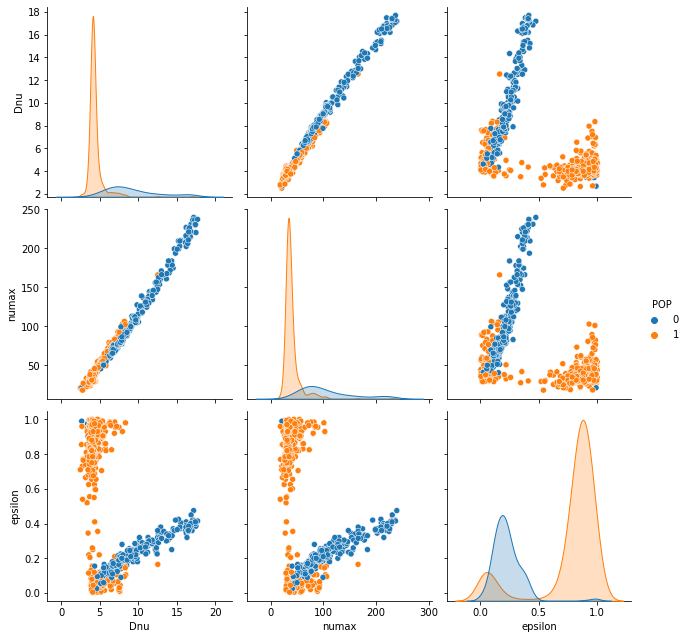

In [7]:
sns.pairplot(df, hue="POP", height=3)

In [8]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression(random_state = 42)
clr = clr.fit(x_train, y_train)

In [11]:
y_pred = clr.predict(x_test)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        88
           1       0.97      0.97      0.97       213

    accuracy                           0.96       301
   macro avg       0.95      0.95      0.95       301
weighted avg       0.96      0.96      0.96       301



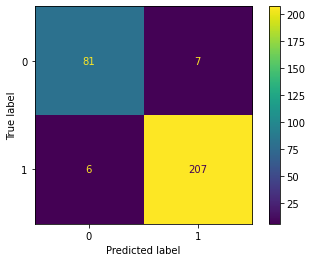

In [12]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_test, y_pred))
plot_confusion_matrix(clr, x_test, y_test)
plt.show()

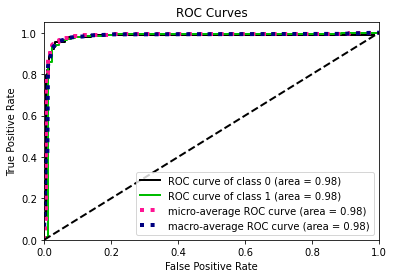

In [13]:
predicted_probas = clr.predict_proba(x_test)
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

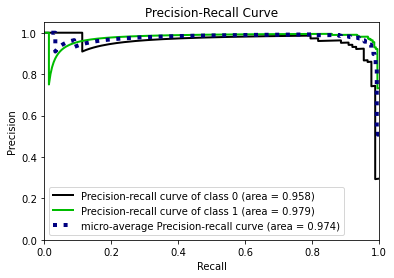

In [14]:
skplt.metrics.plot_precision_recall(y_test, predicted_probas)
plt.show()